# Data preparation: from raw to analyzable data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns 


In [2]:
import os
os.chdir('C:/Users/lukeh/OneDrive/Documents/College/Topics in Data Science/Unit 1')
df = pd.read_csv('dhs_service_records_synthesized_final.csv')

### revisit the making of some simple charts

* many choices for plotting libraries, we uses two below

* https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

* https://seaborn.pydata.org/examples/index.html



### making a histogram for the age column in the data

* using metplotlib.pyplot

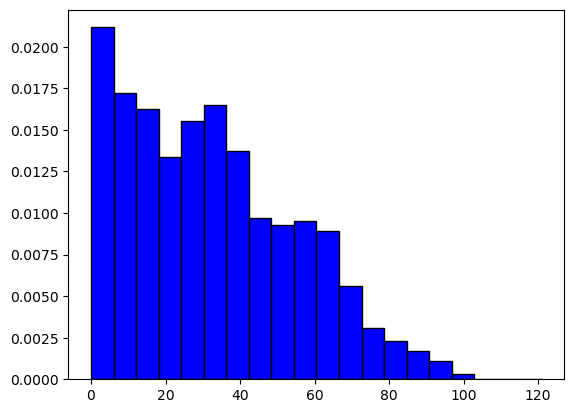

In [3]:
import matplotlib.pyplot as plt
plt.hist(df['age'], bins = 20, color = 'blue', edgecolor = 'black', density=True)
plt.show()

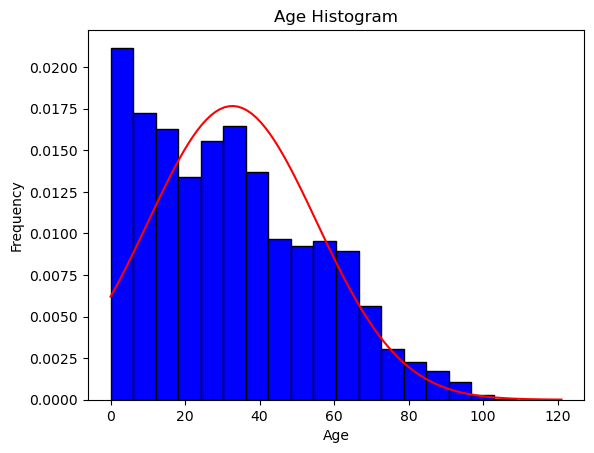

In [4]:
plt.hist(df['age'], bins = 20, color = 'blue', edgecolor = 'black', density=True)

# add normal distribution to see the difference 
mu = df['age'].mean()
sigma = df['age'].std()
x = np.linspace(df['age'].min(), df['age'].max(), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

plt.plot(x, y, color = 'red')

plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* plot two charts side by side

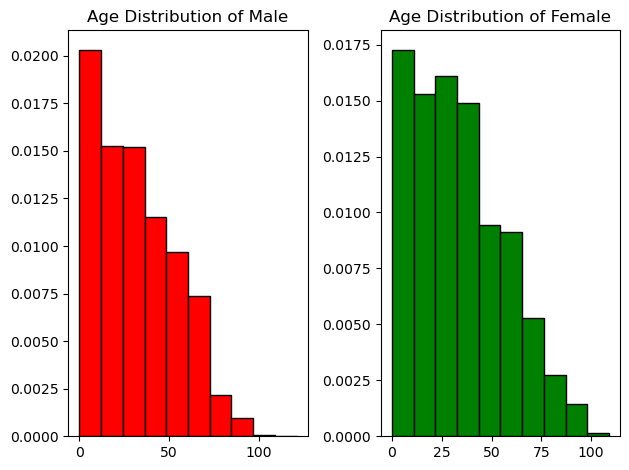

In [5]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)

ax0.hist(df[df["GENDER"]=="1~Male"]["age"], bins=10, density=True, histtype='bar', color="red", edgecolor = "black")
ax0.set_title('Age Distribution of Male')

ax1.hist(df[df["GENDER"]=="2~Female"]["age"], bins=10, density=True, histtype='bar', color = "green", edgecolor = "black")
ax1.set_title('Age Distribution of Female')

fig.tight_layout()
plt.show()

* use seaborn library

In [ ]:
sns.displot(df['age'], bins = 50, color = 'blue', kde = True)


### to investigate the issue, 
* need to trace back the parameters 
* seaborn layers on top of metplotlib
* sns.displot calls differet functions from within metplotlib, depending on the parameters, when bin number is bigger, or not given, displot calls different functions, the kde line stopps pairing with the height

KeyboardInterrupt: 

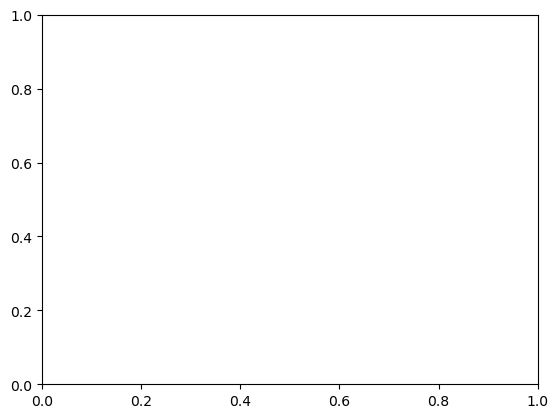

In [10]:

sns.kdeplot(df['age'], color = 'blue')

* make a boxplot of age, separated by gender

In [ ]:
sns.boxplot(data = df, x = "GENDER", y = "age")
plt.title('Age Distribution of DHS Service')
plt.show()

* make a count plot

In [ ]:
sns.countplot(x = df['EDUCATION_LEVEL'])
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

* to rotate the chart, just switch the x and y

In [ ]:
sns.countplot(y = df['EDUCATION_LEVEL']) 
plt.title('Education Level Distribution')
plt.ylabel('Education Level')
plt.xlabel('Frequency')
plt.show()

* make a barplot

In [ ]:
sns.barplot(data=df, x="RACE", y="age")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby("RACE")["age"].mean()

### Removing NA Columns and Rows

* if we take a look of the data summary, we can spot the NA's

In [ ]:
df.describe()

* To drop NaN values, we can use a simple function called `df.dropna()`.

In [ ]:
df.dropna(how='all', inplace=True)
df.shape

Note to collaborators: dropping all NA rows like this has no effect as there are no rows of only NA values.

With this function, the default parameter for a hidden value `axis` removed rows of only NA values. To remove columns, we need to specify the axis.

In [ ]:
#we want to remove any of the rows that have only NA values.
df.dropna(axis=1, how='all', inplace=True)
df.shape

df.dropna(inplace=True)  will drop rows with any NA.

Note: I am still going to include code that would remove rows with only NA values, even though it is not relevant for this dataset. Github copilot says that df.dropna(axis=0, how='all', inplace=True) works, and I trust it for the moment.

Now what if we wanted to drop a row with a single NA value? We can simply remove the how='all' parameter and it will remove the rows with at least one NA value.

We can also drop the columns that has only one value in its entirety as they have not information. 

In [ ]:
df.drop(['synthetic_data', 'CALDR_YR'], axis=1, inplace=True)
df.shape

In [ ]:
df.info()

We can also lower case the columns for ease of work

In [ ]:
df[df.MCI_UNIQ_ID==25958]

In [ ]:
df.rename(columns=str.lower, inplace=True)
df.info()

## change column names for ease of work


In [ ]:
df.rename(columns = {'mci_uniq_id': 'id', 
                    'date_of_event': 'date', 
                    'marital_status': 'marital', 
                    'education_level':'education'}, inplace=True)
df.info()

In [ ]:
df.shape

In [ ]:
df[df.id==25958]

# Basic Transformations

Often times when we encounter data, we find that it is in a format that is a bit clunky to use. Part of EDA will be to make datasets more friendly. Here we will go over four transformations: substitution, generation, outlier removal, and illogical value removal.

## Substitution

For the data entries that have strings in certain columns, like "Individuals_Receiving_DHS_Services", we may need to alter these. Strings can be a bit clunky to work with and are generally read better for plots when we have them in categories. Additionally, we can try and do some mathematical tests on them when we have numerical category labels.

In [ ]:
df.service.nunique()

In [ ]:
df.service.unique()

## change some columns into catgorical type

we want to turn the columns for gender, race, ethnicity, marital status, and education level into the category data type.

In [ ]:
df = df.astype({'id':'category', 
                'service':'category',
                'age': 'int',
                'gender':'category',
                'race':'category',
                'marital':'category',
                'education':'category'})


In [ ]:
df.info()

In [ ]:
df[df.id==25958]

## Generating new variabes
In other cases, we may want to generate a new variable. These can simply be combinations of previous variables, but in the case of this dataset, we will convert the "age" column to a categorical datatype variable as well. We will do this by putting ages in bins of 10 years.

In [ ]:
#first we will define a helper function that takes in an int
#and returns the corresponding age bin value (grouped by 10), so a 5 gets returned as "0-9"
def age_bin(age):
    if age < 10:
        return "0-9"
    elif age < 20:
        return "10-19"
    elif age < 30:
        return "20-29"
    elif age < 40:
        return "30-39"
    elif age < 50:
        return "40-49"
    elif age < 60:
        return "50-59"
    elif age < 70:
        return "60-69"
    elif age < 80:
        return "70-79"
    elif age < 90:
        return "80-89"
    else:
        return "90+"
    
#is there a better way to do this? I am not sure, but we will go with this anyway. 
#it gets the job done.


#we will now apply this function to the age column and create a new column called AGE_BIN
df["age_bin"] = df["age"].apply(age_bin).astype('category')
df.head()

In [ ]:
df.groupby("age_bin").count().sort_values(by="id",ascending=False)

## Working with date

We can generating additional variables for months in which the recipients use the service, for instance. 

We can do this by string operation, ie., to split the date of event so we get the month in which each service occurs. We can do this by simply getting the first two characters of the `date` column. 

In [ ]:
#make a new month column
#this is the first two characters of the date column and the last 5 characters of the column
df["month_str"] = df["date"].str[:2] + df["date"].str[-5:]
df.head()

More appropriately, and easily, is to cast the "date" column into datetime type, which will give us many useful functions that works on datetime types.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df["date"].dt.month_name()
df.head()

## Outlier Removal
Often times, data will have outliers. These are data points that are very far from the majority of the data. In the case of a dataset with all categorical variables, this is not often feasible. However, such an act is more common with numeric features. Let's try the age category and remove all the rows with age 105 or greater.

In [ ]:
#want to remove all entries from the dataset where the age entry is 105 or more
df[df["age"] >= 110].age.unique()


In [ ]:
df[df["age"] >= 90].age.unique()


In [ ]:
df = df[df["age"] < 110] # this removes the records that have age greater than or equal to 110
df.shape

## Illogical Value Removal
This portion of data transformations is slightly harder as we will have to look at multiple features at the same time. However, it is still important. Some data points in the dataset have children of age 5, yet lists them as in high school.

we may want to remove all the values where the age is 0-9 AND where they are listed as in high school as "9-12~High School (grade 9-12)".

however, the number of receipients in this group seems to be rather high. As a synthetic dataset, this might be due to synthesis process/algorithm. The technical report on the synthetic dataset had mentioned that the synthetic data on rare combinations of more than one variables has bigger distnace from real data (in this case, it should be zero). 

If this is real data, this may indicate it is rather a data collection issue and not to dismissed. 


In [ ]:
df[((df["age_bin"] == "0-9") & (df["education"] == "9-12~High School (grade 9-12)"))].id.unique()


# Advanced Transformations

Sometimes when doing exploratory data analysis, the storage format of the table does not give a complete view of the picture. In the case of this dataset, we found earlier that there were several rows with the same ID, which means that there are multiple entries for some people. This indicates that they used the services provided in the dataset multiple times. 

To get a better picture of some data insights, we can make a new dataframe; this one will have one row for each ID, and we will add the columns regarding the number of services used, number of distinct services used, and the number of months the services were used. Because the dataset is big, this may take a while.

In general cases, to find new transformations for the datasets you work with, you will need to think about the general direction to take the data, which can involve simply thinking about the data logically. However, a better approach is to consult domain knowledge. This basically involves looking to sources related to the data (research articles, people who collected the data, people who are knowledgeable on the subject) and transforming the data as they may advise, or getting advice on where to look for ideas on transformations.

Here, we are going to perform two aggregative transformations. These will group the entries of the dataset by the ID, as well as by the (ID, Month) pairing and compute some summary statistics, including the number of services used, the number of months the services were used, and the range of dates the services were used.

In [ ]:
df[df.id==25958]

In [ ]:
def get_recipient_attribute(df):
    recipient = df.groupby(['id']).agg(
        num_service = ('service', 'count'),
        distinct_service = ('service', 'nunique'), 
        first_date = ('date', 'min'), 
        last_date = ('date', 'max'), 
        num_month = ('month', 'count'), 
        distinct_month = ('month', 'nunique')
    ).reset_index()

    return recipient


* agg made "id" into index in the aggregation result 
* reset_index() put the old index ("id" in this case") into a column, and use sequential index 

In [ ]:

recipient = get_recipient_attribute(df)
recipient.head()

Similarly, we perform the recipient-month attribute aggregations. For recipient and month combination, number of services and number of distinct services are the same.
The service usage for each recipient and each month is only a flag, indicating the use but not recording how many times within the month. 

In [ ]:
def get_recipient_month_attribute(df):
    recipient_month = df.groupby(['id', 'month']).agg(
        num_service = ('service', 'count'),
    ).reset_index()

    return recipient_month


In [ ]:
recipient_month = get_recipient_month_attribute(df)
recipient_month.head()

Now, we can merge the datasets in a sense so that some of the information about each person can carry over to the new datasets we've created. Specifically, we want to carry over gender, race, ethnicity, education level, and marital status. 

In [ ]:
#start with recipient
#we want to add columns of age, gender, race, ethnicity, education level, and marital status
#from the original dataset, making sure IDs match up and that there is only one occurrence of each ID.
recipient = pd.merge(recipient, df[['id', 'age', 'gender', 'race', 'ethnicity', 'marital', 'education','age_bin']], on='id', how='left')
#now remove duplicate rows
recipient = recipient.drop_duplicates(subset=['id'])
recipient.head()

In [ ]:
#we'll do the same with recipient_month
recipient_month = pd.merge(recipient_month, df[['id', 'age', 'gender', 'race', 'ethnicity', 'marital', 'education','age_bin']], on='id', how='left')
#now remove rows that have duplicate ID-month pairs
recipient_month = recipient_month.drop_duplicates(subset=['id', 'month'])
recipient_month.head()

# Saving Data Transformations
If you want to close your work and come back to it easily without having to rerun all of the above code, or if you want to use the same data in a new notebook, an easy workaround is to save the data to an intermediate file and then reload it. We'll be saving all of our datasets to files that we will then plot in the next section.

* the above cell is made into "raw" so it does not get to be run when we do "run all"

## Looking at number of services


In [ ]:
recipient.info()

In [ ]:
recipient.describe()

this says for most of recipients, the number of services is 12, and number of disctinct services is 1. 

but why do we have min as zero service? supposed the data file contains the usage of services, why would someone not using service and still in the data file? Recall we have removed recipients who are older than 110? 

In [ ]:
recipient[recipient.num_service == 0].id.to_list()

In [ ]:
recipient[recipient.num_service == 0]

In [ ]:
# to verify, re-read the data file as orignal and check
check_list = recipient[recipient.num_service == 0].id.to_list()
df1 = pd.read_csv('dhs_service_records_synthesized_final.csv')
df1[df1.MCI_UNIQ_ID.isin(check_list)]

these are the three recipients that we removed during outlier removal, who have age greater than 110.

Hence, we may consider making catgegory type change after removing outliers, the ID of the removed records will not make into the category label list.

* alternatively, we can remove the unused categories when doing groupby

In [ ]:
recipient.shape

In [ ]:
recipient[recipient.distinct_service==0].shape

In [ ]:
recipient[recipient.distinct_service==1].shape

In [ ]:
def get_recipient_attribute(df):
    recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(  ### remove unused categories 
        num_service = ('service', 'count'),
        distinct_service = ('service', 'nunique'), 
        first_date = ('date', 'min'), 
        last_date = ('date', 'max'), 
        num_month = ('month', 'count'), 
        distinct_month = ('month', 'nunique')
    ).reset_index()

    return recipient

In [ ]:
recipient_new = get_recipient_attribute(df)


In [ ]:
recipient_new.shape

* we see the ID size (number of rows) is reduced by 3, the outliers that were removed in earlier step.

* based on my experience, not making the ID column as category type is the best in accordance with the need of having categorical variables. IDs are unique for an entity, in our case it is for the recipient. there is no real meaning that each ID is a category label. Therefore making ID as integer is appropriate.

### Now, going back to inspect the number of services

In [ ]:
import seaborn as sns
sns.displot(recipient, x="num_service")

this says many people may have similar number of services, maybe even same number of services, need to drill down.

we can take a look at the distict services recipients use

In [ ]:
sns.displot(recipient, x="distinct_service", hue = "gender", multiple="dodge")


Now we can see right away that overwhelming majority of recipients uses only one service in the entire year.

In [ ]:
sns.displot(recipient, x="distinct_month", hue = "gender", multiple="dodge")


In-class work: 

- identify the top services by number of recipients
     - you can choose to do by other measures (e.g., total usage months)
- define a python function that computes characteristic attributes for services
     - input: the service recipient event dataset
     -  output: a data frame, with rows for services and columns for various attributes of the services
     -  design your own attributes, see examples of attributes for recipients
- create a new dataframe that hold attributes for services
     - row keyed by service
     - columns contain attributes that output by the function you created
- experiment aggregation with or without reset_index() and see what happens


In [ ]:
top_services = df.groupby('service')['MCI_UNIQ_ID'].count()
top_services_sorted = top_services.sort_values(ascending=False)
print(top_services_sorted)


In [ ]:
define a python function that computes characteristic attributes for services
     - input: the service recipient event dataset
     -  output: a data frame, with rows for services and columns for various attributes of the services
     -  design your own attributes, see examples of attributes for recipients

In [ ]:
def get_service_attribute(df):
    service = df.groupby(df['service']).agg(
        num_service = ('service', 'count'),
        distinct_id = ('id', "nunique"),
        first_date = ('date', "min"),
        late_date = ('date', "max"),
        num_month = ("month", 'count'),
        distinct_month = ('month', 'nunique')
    ).reset_index()
    return service

In [ ]:
get_service_attribute(df)